In [12]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import style

In [7]:
hist_data = pd.read_csv("../Data_Sources/IEXCloudAPI/historical_stock_NASDAQ.csv")
hist_data.head()

,symbol,date,uClose,uOpen,uHigh,uLow,uVolume,close,open,high,low,volume,currency,change,changePercent,label,changeOverTime
0,AAPL,08/31/2015,115.94,115.83,116.50,114.00,58635323,115.15,116.80,119.41,116.00,56938713,NaN,0.00,0.0000,31-Aug-15,0.000000
1,AAPL,09/01/2015,109.60,110.67,116.52,108.21,78386950,112.79,113.35,116.22,112.09,80534174,NaN,-5.20,-4.6765,01-Sep-15,-0.045822
2,AAPL,09/02/2015,112.98,115.09,114.26,110.68,61899409,115.88,113.36,115.59,113.76,61959735,NaN,4.78,4.3872,02-Sep-15,-0.003898
3,AAPL,09/03/2015,114.67,117.99,114.75,111.05,55434852,110.59,113.87,116.25,113.68,55207240,NaN,-1.99,-1.7587,03-Sep-15,-0.021899
4,AAPL,09/04/2015,111.64,111.00,112.70,110.29,52493830,112.93,109.59,114.78,110.89,50851532,NaN,-1.10,-1.0015,04-Sep-15,-0.031319


In [24]:
type(hist_data["date"])

pandas.core.series.Series

In [25]:
hist_data["date"] = hist_data["date"].apply(pd.to_datetime)

In [27]:
hist_data.head()

,symbol,date,uClose,uOpen,uHigh,uLow,uVolume,close,open,high,low,volume,currency,change,changePercent,label,changeOverTime
0,AAPL,2015-08-31,115.94,115.83,116.50,114.00,58635323,115.15,116.80,119.41,116.00,56938713,NaN,0.00,0.0000,31-Aug-15,0.000000
1,AAPL,2015-09-01,109.60,110.67,116.52,108.21,78386950,112.79,113.35,116.22,112.09,80534174,NaN,-5.20,-4.6765,01-Sep-15,-0.045822
2,AAPL,2015-09-02,112.98,115.09,114.26,110.68,61899409,115.88,113.36,115.59,113.76,61959735,NaN,4.78,4.3872,02-Sep-15,-0.003898
3,AAPL,2015-09-03,114.67,117.99,114.75,111.05,55434852,110.59,113.87,116.25,113.68,55207240,NaN,-1.99,-1.7587,03-Sep-15,-0.021899
4,AAPL,2015-09-04,111.64,111.00,112.70,110.29,52493830,112.93,109.59,114.78,110.89,50851532,NaN,-1.10,-1.0015,04-Sep-15,-0.031319


In [34]:
apple_df = hist_data[hist_data["symbol"]=="AAPL"]
apple_df.head()

,symbol,date,uClose,uOpen,uHigh,uLow,uVolume,close,open,high,low,volume,currency,change,changePercent,label,changeOverTime
0,AAPL,2015-08-31,115.94,115.83,116.50,114.00,58635323,115.15,116.80,119.41,116.00,56938713,NaN,0.00,0.0000,31-Aug-15,0.000000
1,AAPL,2015-09-01,109.60,110.67,116.52,108.21,78386950,112.79,113.35,116.22,112.09,80534174,NaN,-5.20,-4.6765,01-Sep-15,-0.045822
2,AAPL,2015-09-02,112.98,115.09,114.26,110.68,61899409,115.88,113.36,115.59,113.76,61959735,NaN,4.78,4.3872,02-Sep-15,-0.003898
3,AAPL,2015-09-03,114.67,117.99,114.75,111.05,55434852,110.59,113.87,116.25,113.68,55207240,NaN,-1.99,-1.7587,03-Sep-15,-0.021899
4,AAPL,2015-09-04,111.64,111.00,112.70,110.29,52493830,112.93,109.59,114.78,110.89,50851532,NaN,-1.10,-1.0015,04-Sep-15,-0.031319


In [35]:
apple_df.shape

(1259, 17)

### Computing the rolling mean for Apple

In [36]:
close_px = apple_df["close"]
mavg = close_px.rolling(window = 100).mean()

In [37]:
mavg.tail()

1254    359.7622
1255    362.4156
1256    365.1686
1257    367.4913
1258    369.8248
Name: close, dtype: float64

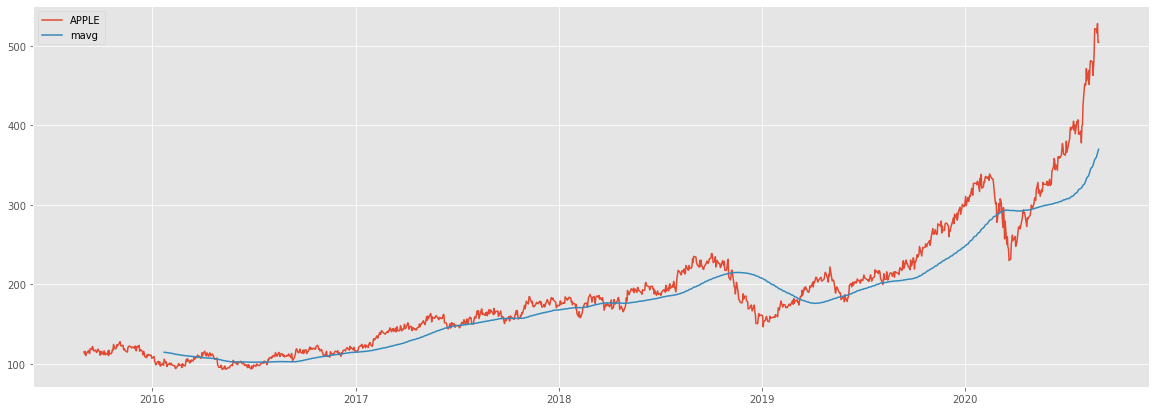

In [43]:
import matplotlib as mpl
mpl.rc("figure", figsize=(20,7))
style.use("ggplot")
plt.plot(apple_df["date"], close_px, label="APPLE")
plt.plot(apple_df["date"], mavg, label = "mavg")
plt.legend()
plt.show()

### Getting the returns for Apple

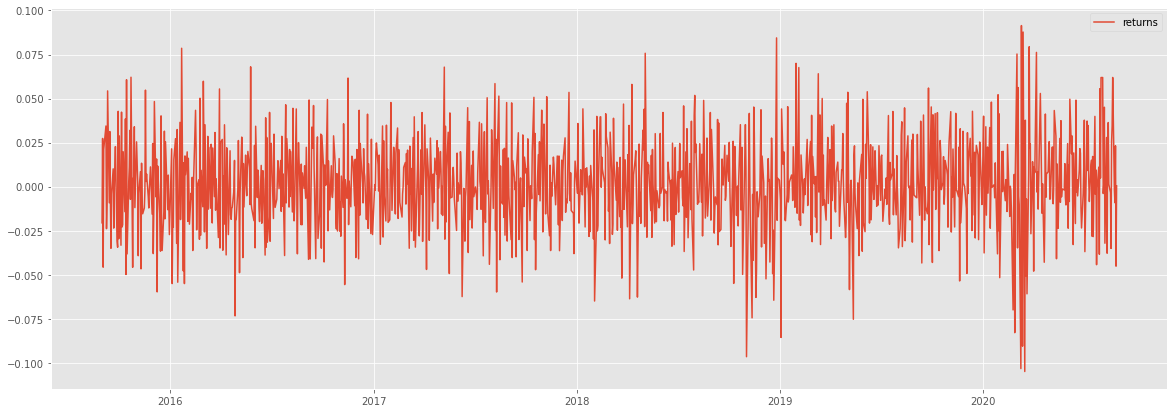

In [41]:
rets = close_px / close_px.shift(1)-1
plt.plot(apple_df["date"], rets, label = "returns")
plt.legend()
plt.show()

### Analysing competitors Stocks

In [189]:
# Getting data from the top 5 companies (excluding google)
amazon_df = hist_data[hist_data["symbol"]=="AMZN"]
microsoft_df = hist_data[hist_data["symbol"]=="MSFT"]
facebook_df = hist_data[hist_data["symbol"]=="FB"]
tesla_df = hist_data[hist_data["symbol"]=="TSLA"]

amazon_df.reset_index(drop=True, inplace=True)
microsoft_df.reset_index(drop=True, inplace=True)
facebook_df.reset_index(drop=True, inplace=True)
tesla_df.reset_index(drop=True, inplace=True)

In [190]:
dfcomp = apple_df[["date", "close"]]
dfcomp = dfcomp.rename(columns={"close": "aapl"})

In [191]:
dfcomp["amzn"] = amazon_df["close"]
dfcomp["msft"] = microsoft_df["close"]
dfcomp["fb"] = facebook_df["close"]
dfcomp["tsla"] = tesla_df["close"]
dfcomp= dfcomp.drop("date", axis=1)

In [192]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
corr

,aapl,amzn,msft,fb,tsla
aapl,1.000000,0.284663,0.289907,0.250623,0.224168
amzn,0.284663,1.000000,0.285458,0.305182,0.223507
msft,0.289907,0.285458,1.000000,0.237433,0.249319
fb,0.250623,0.305182,0.237433,1.000000,0.198379
tsla,0.224168,0.223507,0.249319,0.198379,1.000000


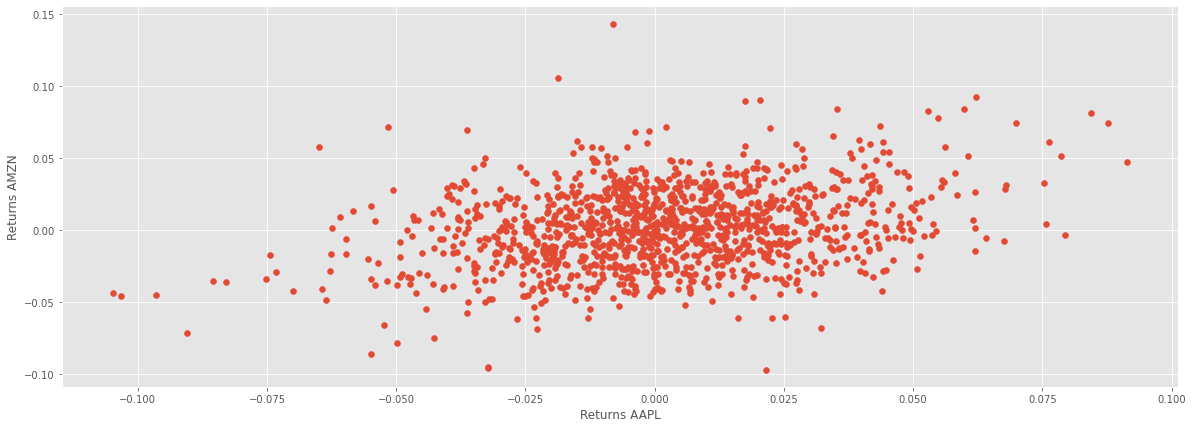

In [194]:
plt.scatter(retscomp.aapl, retscomp.amzn)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns AMZN')
plt.show()

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
//anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
//anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
//anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.

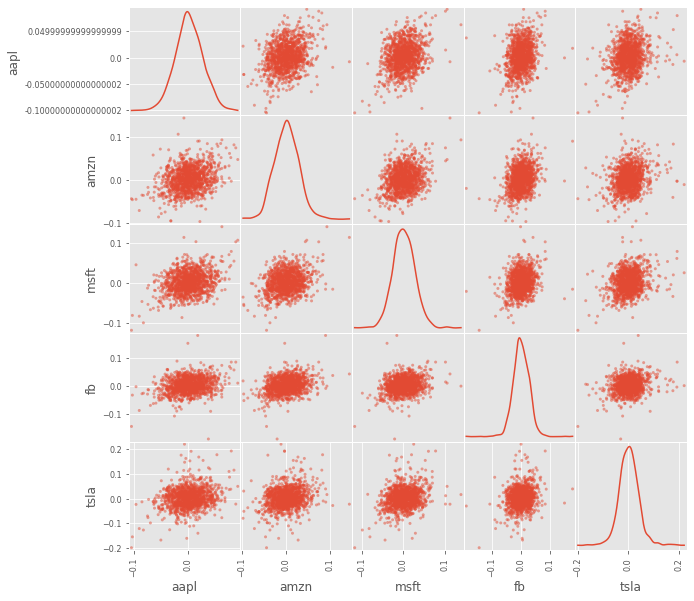

In [200]:
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10))
plt.show()

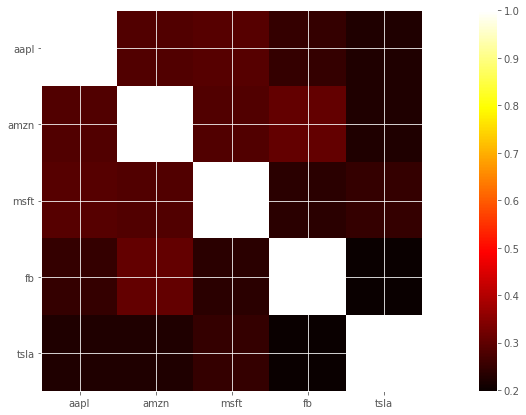

In [202]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

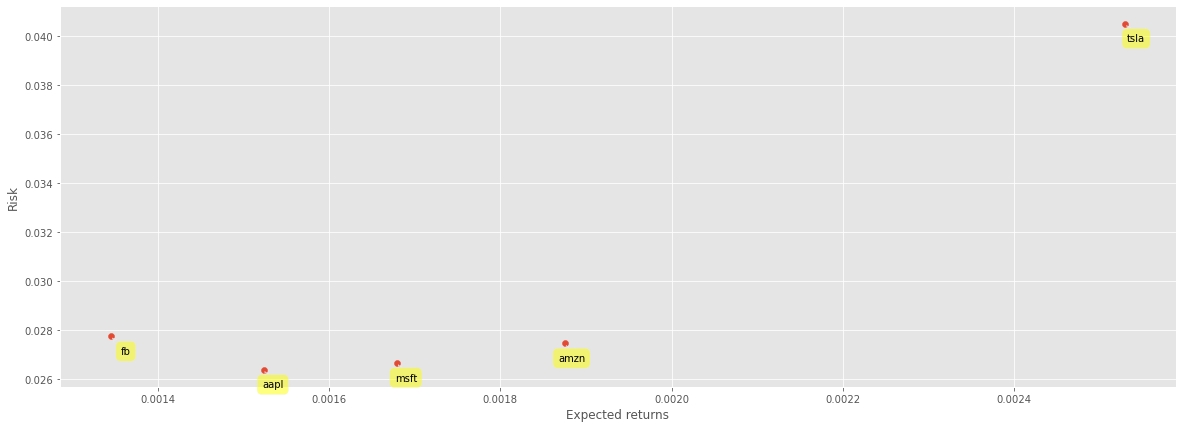

In [203]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

### Predicting the Stock price

In [205]:
apple_df.head()

,symbol,date,uClose,uOpen,uHigh,uLow,uVolume,close,open,high,low,volume,currency,change,changePercent,label,changeOverTime
0,AAPL,2015-08-31,115.94,115.83,116.50,114.00,58635323,115.15,116.80,119.41,116.00,56938713,NaN,0.00,0.0000,31-Aug-15,0.000000
1,AAPL,2015-09-01,109.60,110.67,116.52,108.21,78386950,112.79,113.35,116.22,112.09,80534174,NaN,-5.20,-4.6765,01-Sep-15,-0.045822
2,AAPL,2015-09-02,112.98,115.09,114.26,110.68,61899409,115.88,113.36,115.59,113.76,61959735,NaN,4.78,4.3872,02-Sep-15,-0.003898
3,AAPL,2015-09-03,114.67,117.99,114.75,111.05,55434852,110.59,113.87,116.25,113.68,55207240,NaN,-1.99,-1.7587,03-Sep-15,-0.021899
4,AAPL,2015-09-04,111.64,111.00,112.70,110.29,52493830,112.93,109.59,114.78,110.89,50851532,NaN,-1.10,-1.0015,04-Sep-15,-0.031319


In [213]:
dfreg = apple_df.loc[:,["date", "close","volume"]]
dfreg['HL_PCT'] = (apple_df['high'] - apple_df['low']) / apple_df['close'] * 100.0
dfreg['PCT_change'] = (apple_df['close'] - apple_df['open']) / apple_df['open'] * 100.0
dfreg = dfreg.set_index("date")
dfreg.head()

,close,volume,HL_PCT,PCT_change
date,,,,
2015-08-31,115.15,56938713,2.961355,-1.412671
2015-09-01,112.79,80534174,3.661672,-0.494045
2015-09-02,115.88,61959735,1.579220,2.223006
2015-09-03,110.59,55207240,2.323899,-2.880478
2015-09-04,112.93,50851532,3.444612,3.047723


In [214]:
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate


# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

print(dfreg.shape)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

print('Dimension of X',X.shape)
print('Dimension of y',y.shape)

(1259, 4)
Dimension of X (1246, 4)
Dimension of y (1246,)


In [215]:
X

array([[-0.91664686,  1.33408615,  0.48255212, -0.63938132],
       [-0.94681669,  2.78392589,  0.79103623, -0.25352038],
       [-0.90731467,  1.64260638, -0.12626705,  0.88775337],
       ...,
       [ 3.44263844,  0.97145498, -0.70601978,  0.26195932],
       [ 3.6055044 ,  1.15224428, -0.39915464,  0.59888691],
       [ 3.37935849,  0.76175307, -0.01843247, -0.67957932]])

In [219]:
# Separating values in training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Model

In [220]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)
    
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [221]:
# Testing the model
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

print("The linear regression confidence is ",confidencereg)
print("The quadratic regression 2 confidence is ",confidencepoly2)
print("The quadratic regression 3 confidence is ",confidencepoly3)
print("The knn regression confidence is ",confidenceknn)

The linear regression confidence is  0.9588051489628076
The quadratic regression 2 confidence is  0.95780214306329
The quadratic regression 3 confidence is  0.957010663609787
The knn regression confidence is  0.9283186365526123


The most accurate is the linear regression

In [226]:
X_lately

array([[ 3.53723876,  0.4260919 ,  0.06849071,  1.12667938],
       [ 3.75302978,  1.17277679,  0.51856341,  0.33512478],
       [ 3.76159494,  0.49500891, -0.96381751,  0.76201021],
       [ 3.74114082, -0.28822352,  1.79532848, -0.41847201],
       [ 3.52650035, -0.51677894, -0.60389655, -0.66493209],
       [ 3.67671032,  0.15765767, -0.9908706 , -0.14315926],
       [ 3.88687645, -0.18456069, -0.10763794,  1.36003186],
       [ 4.27588833,  3.25337766,  0.88741032,  2.80078865],
       [ 4.26578911,  3.28419766,  0.65983236, -0.88660557],
       [ 4.20519377,  1.21300382,  0.95099807,  0.47755612],
       [ 4.35821619,  0.42387918,  0.1329144 ,  0.84976186],
       [ 4.05408892,  0.24338082, -0.36565874, -1.49292083],
       [ 4.05728488,  0.73022467,  0.39938264, -1.11834674]])

In [233]:
# Forecast
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
print(forecast_set, confidencereg, forecast_out)

[486.66414679 506.19276992 507.39242332 506.5528445  491.22328307
 502.66169413 515.98706604 542.98879109 551.60901676 543.61729166
 556.61800404 537.34578662 535.81754762] 0.9588051489628076 13


### Prediction

In [234]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

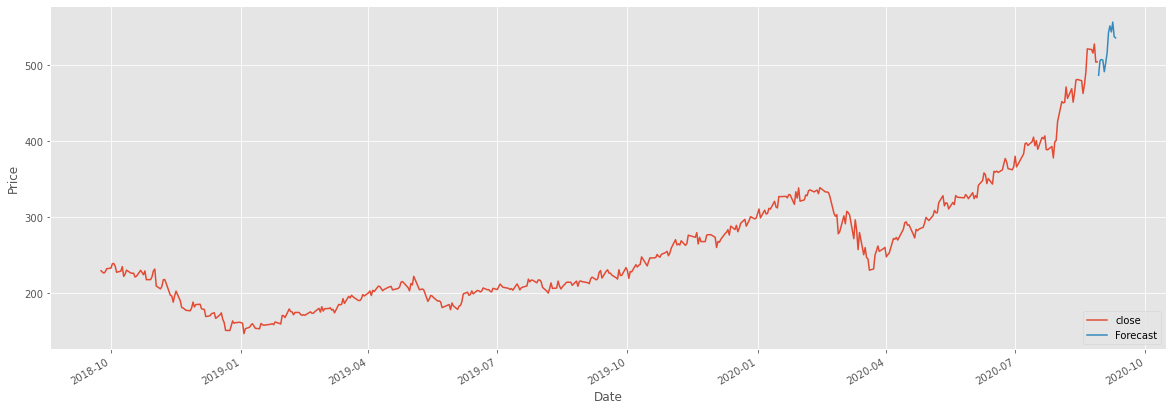

In [235]:
dfreg['close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

The blue line represents the prediction using the linear regression model